# Linear regression  on 50_Startups.csv dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/sample_data/50_Startups.csv')

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
x = df[['R&D Spend']].values
y = df[['Profit']].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=4)

In [ ]:
x_train.shape

(35, 1)

In [ ]:
x_test.shape

(15, 1)

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
x_t=[[165349.20]]
y_pred = reg.predict(x_t)
y_pred

array([[191357.67984463]])

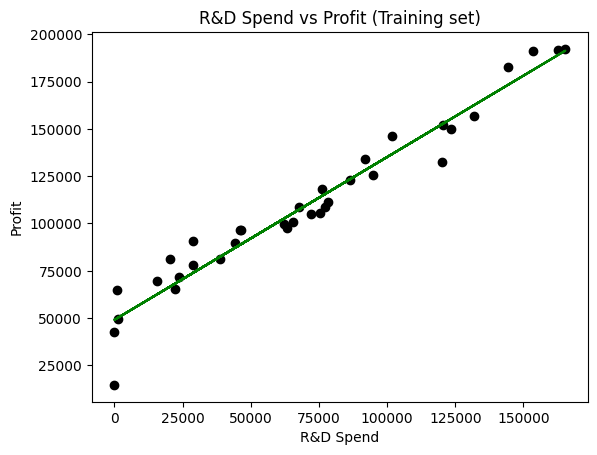

In [ ]:
plt.scatter(x_train, y_train, color = 'black')
plt.plot(x_train, reg.predict(x_train), color = 'green')
plt.title('R&D Spend vs Profit (Training set)')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

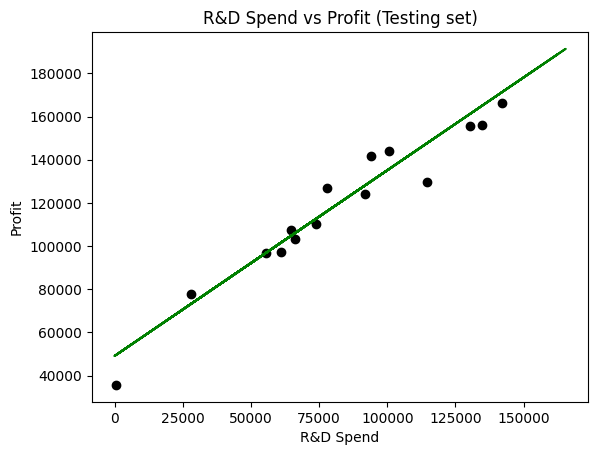

In [ ]:
plt.scatter(x_test, y_test, color = 'black')
plt.plot(x_train, reg.predict(x_train), color = 'green')
plt.title('R&D Spend vs Profit (Testing set)')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

### Multiple Linear Regression

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = ct.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
multiple_regressor = LinearRegression()
multiple_regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = multiple_regressor.predict(X_test)

# Polynomial Linear regression on Position_Salaries.csv dataset

All required dependencies are already intalled previously

In [ ]:
df1 = pd.read_csv('/content/sample_data/Position_Salaries.csv')

In [ ]:
df1.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
X = df1.iloc[:, 1:2].values
y = df1.iloc[:, 2].values

In [ ]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

In [ ]:
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y)

LinearRegression()

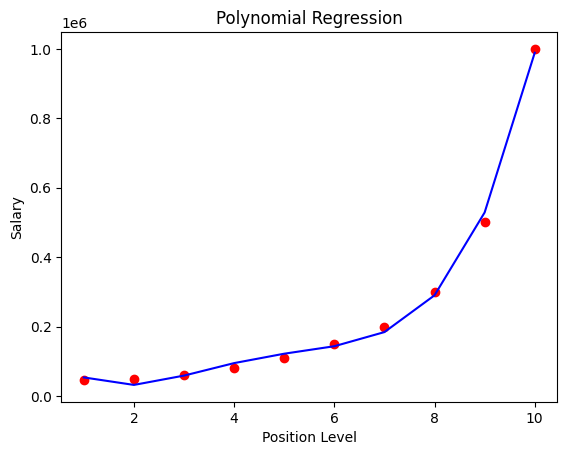

In [ ]:
plt.scatter(X, y, color='red')
plt.plot(X, poly_regressor.predict(poly.fit_transform(X)), color='blue')
plt.title('Polynomial Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Logistic Regression

In [ ]:
df = pd.read_csv('/content/sample_data/Admission_Predict.csv')

df.columns = df.columns.str.strip()

threshold = 0.5
df['Admit'] = (df['Chance of Admit'] > threshold).astype(int)

X = df.drop(['Chance of Admit', 'Admit'], axis=1)
y = df['Admit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.9166666666666666
Confusion Matrix:
 [[  7   7]
 [  3 103]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.94      0.97      0.95       106

    accuracy                           0.92       120
   macro avg       0.82      0.74      0.77       120
weighted avg       0.91      0.92      0.91       120



In [ ]:
coefficients = model.coef_[0]
feature_names = X.columns
coeff_df = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])
print("Model Coefficients:\n", coeff_df)

Model Coefficients:
                    Coefficient
Serial No.            0.765028
GRE Score             0.611475
TOEFL Score           1.133917
University Rating    -0.569379
SOP                  -0.050080
LOR                   0.976974
CGPA                  1.149982
Research             -0.029632
